In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()
df.shape


(1309, 14)

<Axes: xlabel='age', ylabel='fare'>

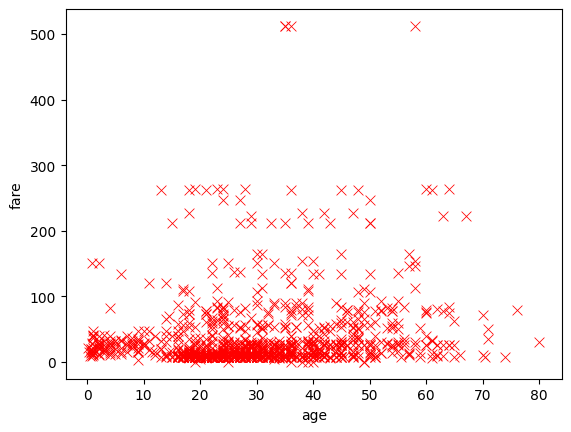

In [2]:
# Fixed properties of the scatter points
sns.scatterplot(data=df,
                x='age',
                y='fare',
                c='red',     # fixed color choice
                s=50,        # fixed size choice
                marker='x')  # fixed marker choice

<Axes: xlabel='age', ylabel='fare'>

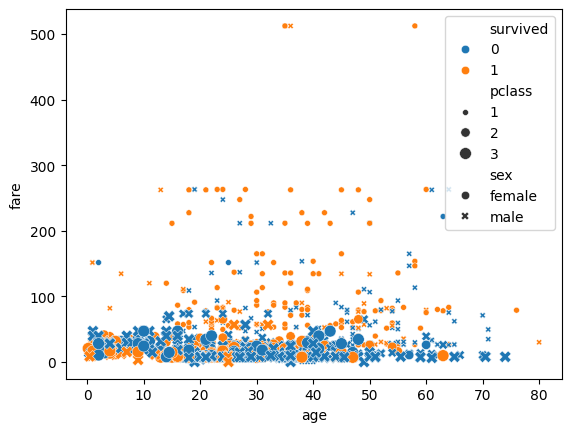

In [3]:
# Mapping columns to visual properties
sns.scatterplot(data=df,
                x='age',
                y='fare',
                hue='survived',  # color mapping
                size='pclass',  # size mapping
                style='sex')    # marker style mapping


<Axes: xlabel='age', ylabel='Count'>

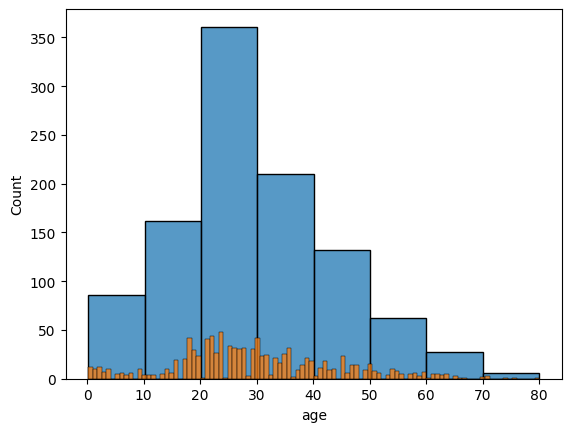

In [7]:

################################
# Other axes-level functions
################################
# Histogram
sns.histplot(data=df, x='age', binwidth=10)
sns.histplot(data=df, x='age', bins=100)


<Axes: xlabel='pclass', ylabel='survived'>

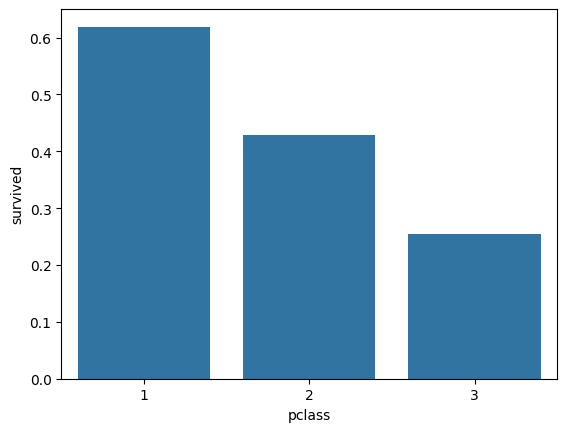

In [8]:
# Barplot
data = df.groupby('pclass').survived.mean().reset_index()
sns.barplot(data=data, x='pclass', y='survived')


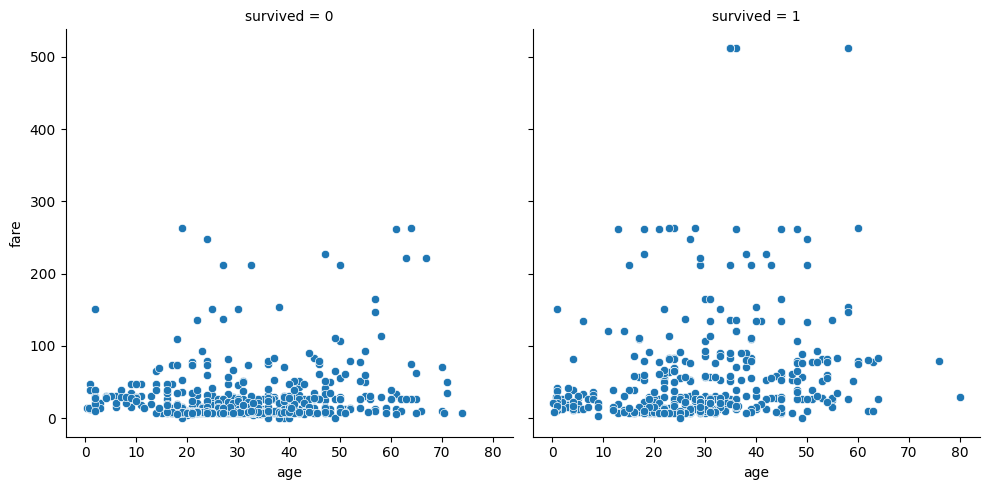

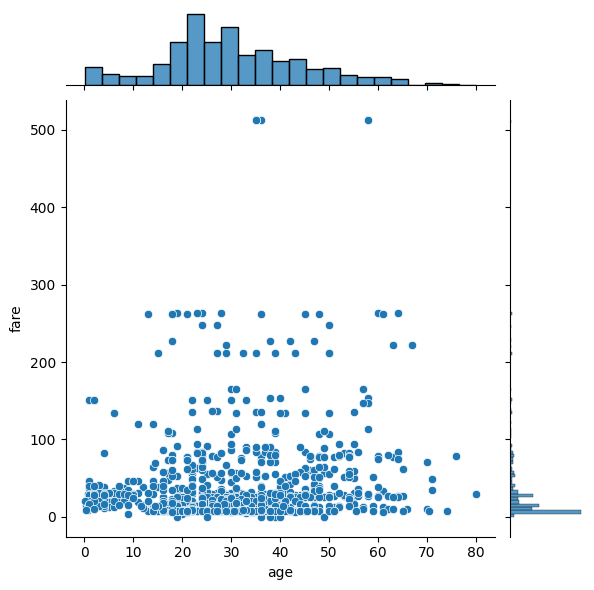

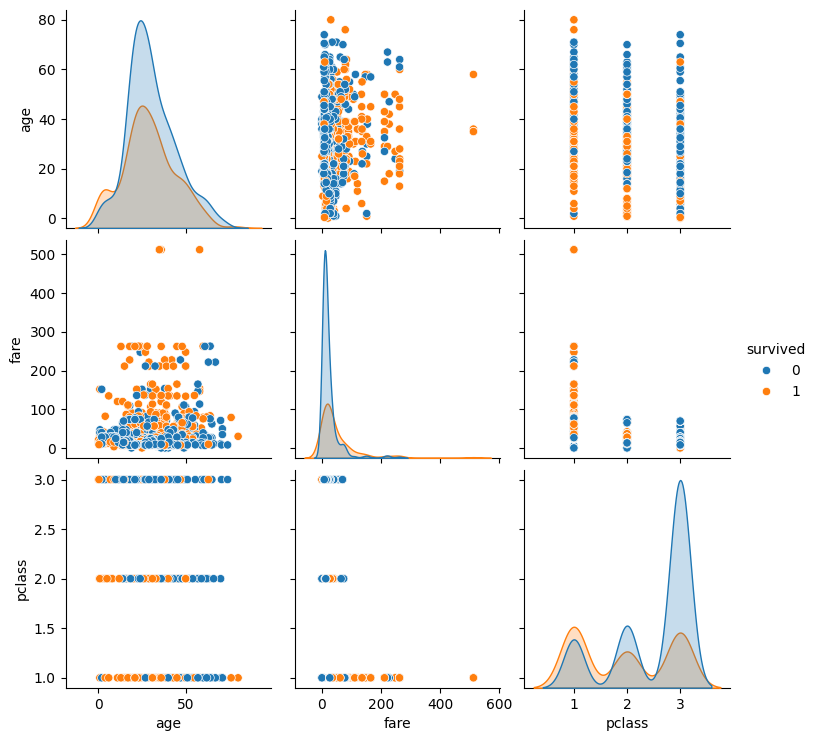

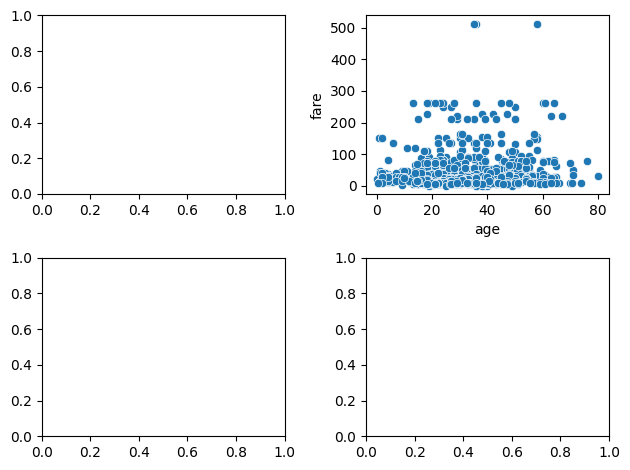

In [9]:
################################
# Figure-level functions
################################

sns.relplot(data=df, x='age', y='fare', col='survived',  kind='scatter')
sns.jointplot(data=df, x='age', y='fare', kind='scatter')
sns.pairplot(data=df, hue='survived', vars=['age', 'fare', 'pclass'])


fig, ax = plt.subplots(nrows=2, ncols=2)
sns.scatterplot(df, x='age', y='fare', ax=ax[0, 1])
fig.tight_layout()

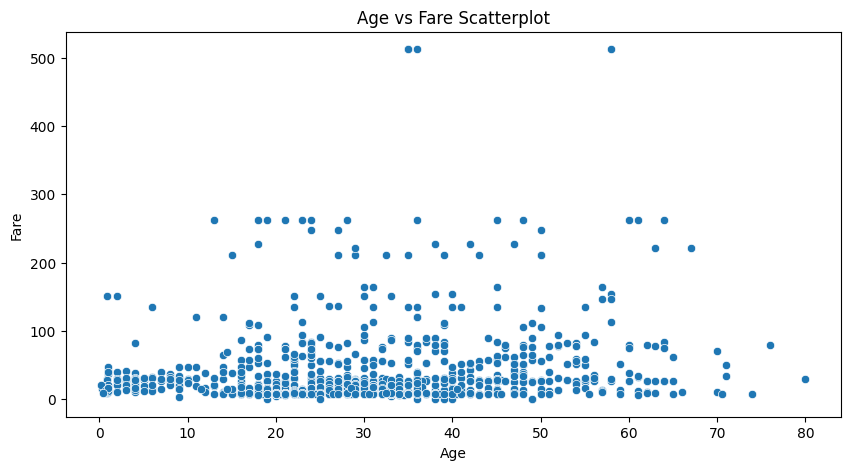

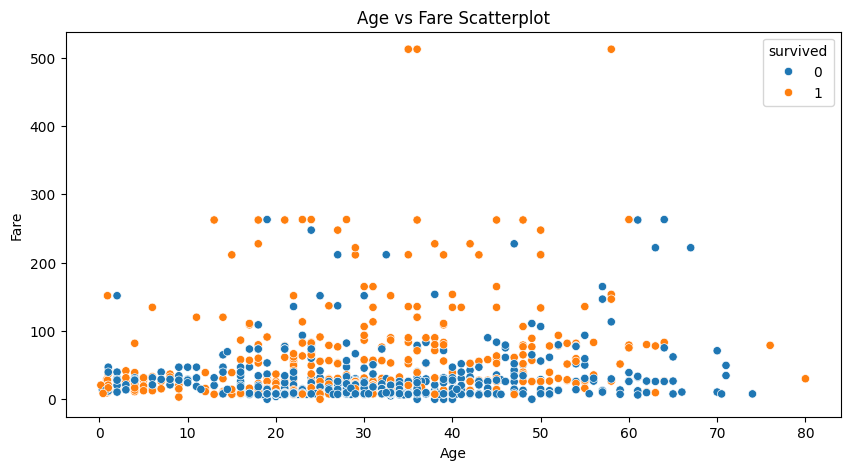

In [10]:
##########################################################
# 2. Implicit Pyplot interface vs Explicit Axes interface
##########################################################

# Implicit Pyplot interface
plt.figure(figsize=(10, 5))
x = sns.scatterplot(data=df, x='age', y='fare')
plt.title("Age vs Fare Scatterplot")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.savefig('scatterplot.svg')

# Explict Axes interface
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=df, x='age', y='fare', hue='survived', ax=ax)
ax.set_title("Age vs Fare Scatterplot")
ax.set_xlabel("Age")
ax.set_ylabel("Fare")
fig.savefig('scatterplot_oo.svg')

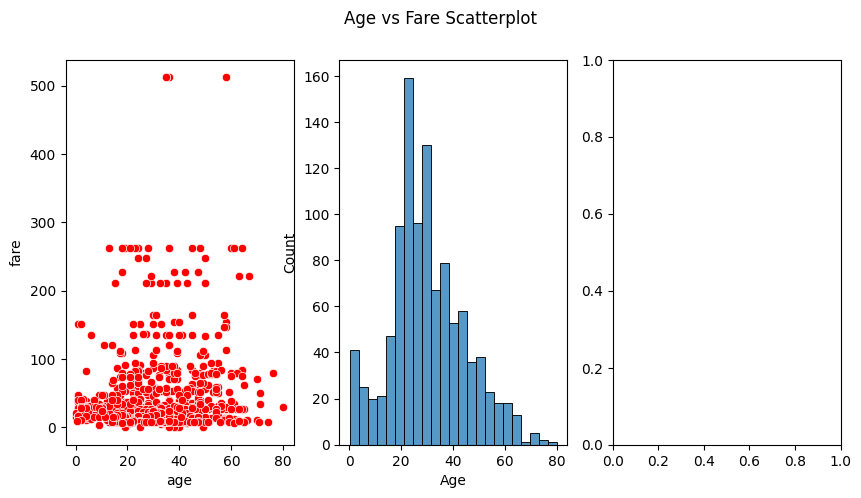

In [11]:
################################
# Arranging multiple plots
################################
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
fig.suptitle('Age vs Fare Scatterplot')
sns.scatterplot(data=df, x='age', y='fare', c='red', ax=ax[0])
sns.histplot(data=df, x='age', ax=ax[1])
ax[1].set_xlabel("Age")
fig.savefig('myfirstfigure.png')


<Axes: ylabel='Frequency'>

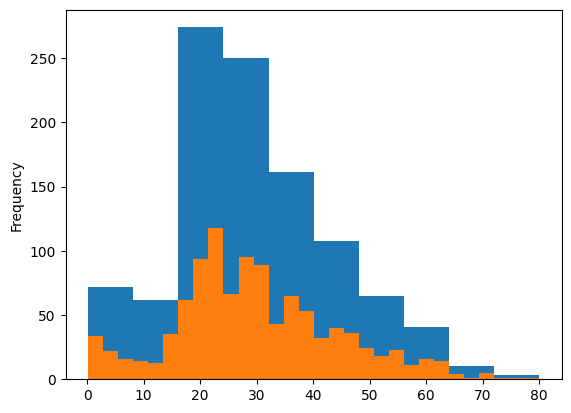

In [12]:
########################
# 3. Pandas
########################

# Histogram

df.age.plot(kind='hist')
df.age.plot.hist(bins=30)

In [14]:
# Bar plot
passengers_per_class = df.groupby("class").size()
passengers_per_class.plot.bar()
passengers_per_class.plot(
    kind="bar", title="Passengers per Class", figsize=(8, 3))

# Plotting on grouped data
df.groupby('sex').plot.scatter(x='age', y='fare')

# Overlaying multiple plots
fig, ax = plt.subplots(figsize=(5, 5))
df[df.survived == 0].plot.scatter(x='age', y='fare', c='red', ax=ax)
df[df.survived == 1].plot.scatter(x='age', y='fare', c='blue', ax=ax)


# Arranging multiple plots
fig, ax = plt.subplots(nrows=1, ncols=2)
df[df.survived == 0].plot.scatter(x='age', y='fare', c='red', ax=ax[0])
df[df.survived == 1].plot.scatter(x='age', y='fare', c='blue', ax=ax[1])

KeyError: 'class'